# Basic Visualization Techniques

## Load and Explore the Data

In [1]:
import pandas as pd

In [2]:
# load the csv file as a dataframe
df = pd.read_csv('old_cars.csv')
print(df.shape)
df.head()

(398, 7)


,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


In [3]:
# show all the origin values
origins = df['Origin'].unique()
origins

array(['US', 'Europe', 'Japan'], dtype=object)

In [4]:
# extract data from each origin
US_df = df[df['Origin'] == 'US']
Europe_df = df[df['Origin'] == 'Europe']
Japan_df = df[df['Origin'] == 'Japan']

In [5]:
US_df.head()

,Car,MPG,Displacement,Horsepower,Weight,Model,Origin
0,AMC Ambassador Brougham,13.0,360.0,175,3821,73,US
1,AMC Ambassador DPL,15.0,390.0,190,3850,70,US
2,AMC Ambassador SST,17.0,304.0,150,3672,72,US
3,AMC Concord,19.4,232.0,90,3210,78,US
4,AMC Concord,24.3,151.0,90,3003,80,US


In [6]:
# description of US data
US_df.describe()

,MPG,Displacement,Horsepower,Weight,Model
count,249.000000,249.000000,249.000000,249.000000,249.000000
mean,20.083534,245.901606,117.136546,3361.931727,75.610442
std,6.402892,98.501839,42.321130,794.792506,3.677094
min,9.000000,85.000000,0.000000,1800.000000,70.000000
25%,15.000000,151.000000,88.000000,2720.000000,73.000000
50%,18.500000,250.000000,105.000000,3365.000000,76.000000
75%,24.000000,318.000000,150.000000,4054.000000,79.000000
max,39.000000,455.000000,230.000000,5140.000000,82.000000


In [7]:
# description of Europe data
Europe_df.describe()

,MPG,Displacement,Horsepower,Weight,Model
count,70.000000,70.000000,70.000000,70.000000,70.000000
mean,27.891429,109.142857,78.257143,2423.300000,75.814286
std,6.723930,22.582079,24.026969,490.043191,3.469506
min,16.200000,68.000000,0.000000,1825.000000,70.000000
25%,24.000000,92.250000,69.000000,2067.250000,73.000000
50%,26.500000,104.500000,76.000000,2240.000000,76.000000
75%,30.650000,121.000000,90.000000,2769.750000,79.000000
max,44.300000,183.000000,133.000000,3820.000000,82.000000


In [8]:
# description of Japan data
Japan_df.describe()

,MPG,Displacement,Horsepower,Weight,Model
count,79.000000,79.000000,79.000000,79.000000,79.000000
mean,30.450633,102.708861,79.835443,2221.227848,77.443038
std,6.090048,23.140126,17.819199,320.497248,3.650595
min,18.000000,70.000000,52.000000,1613.000000,70.000000
25%,25.700000,86.000000,67.000000,1985.000000,74.000000
50%,31.600000,97.000000,75.000000,2155.000000,78.000000
75%,34.050000,119.000000,95.000000,2412.500000,81.000000
max,46.600000,168.000000,132.000000,2930.000000,82.000000


## Task 1: Bar Chart
- Visualize with bar charts the gas mileage distribution of all the models corresponding to the same geographic origin. You will create three bar charts (one for each origin: US, Europe, Japan) and show in each one the distribution of the various gas mileage values of all the cars produced in the corresponding region. For that you will discretize the range of possible gas mileage values in 1 mpg increments.

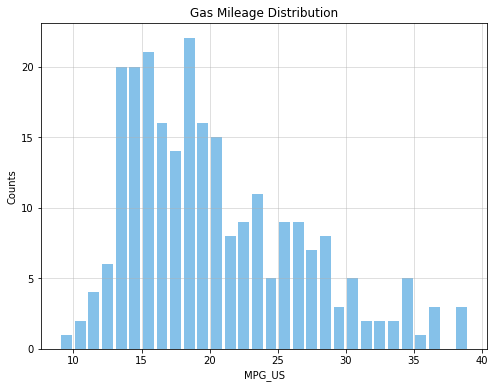

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def compute_bin(contrey_df):
    return int(contrey_df['MPG'].max() - contrey_df['MPG'].min())

# US
plt.figure(figsize=(8,6))
US_df['MPG'].plot.hist(bins=compute_bin(US_df), rwidth=0.8, color='#85C1E9')
plt.grid(alpha=0.5)
plt.title('Gas Mileage Distribution')
plt.xlabel('MPG_US')
plt.ylabel('Counts')
plt.show()

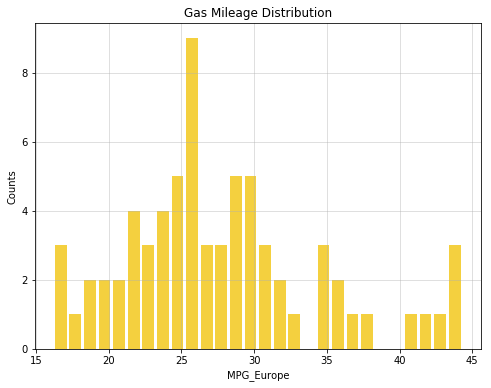

In [10]:
# Europe
plt.figure(figsize=(8,6))
Europe_df['MPG'].plot.hist(grid=True, bins=compute_bin(Europe_df), rwidth=0.8, color='#F4D03F')
plt.grid(alpha=0.5)
plt.title('Gas Mileage Distribution')
plt.xlabel('MPG_Europe')
plt.ylabel('Counts')
plt.show()

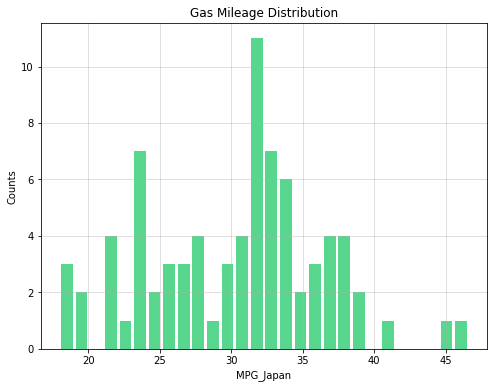

In [11]:
# Japan
plt.figure(figsize=(8,6))
Japan_df['MPG'].plot.hist(grid=True, bins=compute_bin(Japan_df), rwidth=0.8, color='#58D68D')
plt.grid(alpha=0.5)
plt.title('Gas Mileage Distribution')
plt.xlabel('MPG_Japan')
plt.ylabel('Counts')
plt.show()

## Task 2: Line Chart
- Visualize for each geographic origin the temporal evolution of the gas mileage from 1970 to 1982 using a line chart. Each data point will correspond to the annual average of the gas mileage for a given origin and each curve will comprise 13 points. Assign a different color to each curve.

In [12]:
# count avearge gas mileage per year for each origin
US_mean = US_df.groupby('Model').mean()
Europe_mean = Europe_df.groupby('Model').mean()
Japan_mean = Japan_df.groupby('Model').mean()
US_mean.head()

,MPG,Displacement,Horsepower,Weight
Model,,,,
70,15.272727,336.909091,166.954545,3716.500000
71,18.100000,257.000000,113.850000,3401.600000
72,16.277778,281.250000,138.777778,3682.666667
73,15.034483,314.103448,146.620690,3821.448276
74,18.333333,236.066667,104.666667,3503.333333


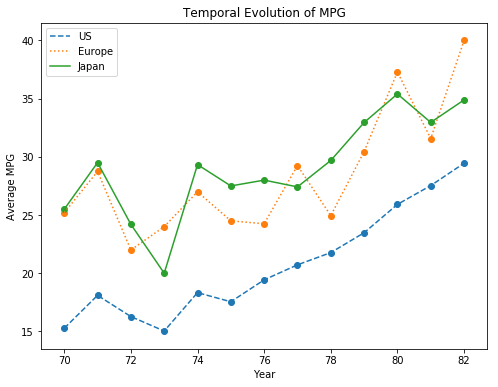

In [13]:
plt.figure(figsize=(8,6))
plt.plot(US_mean.index, US_mean['MPG'],'--', Europe_mean.index, Europe_mean['MPG'], ':', Japan_mean.index, Japan_mean['MPG'])
plt.scatter(US_mean.index, US_mean['MPG'])
plt.scatter(Europe_mean.index, Europe_mean['MPG'])
plt.scatter(Japan_mean.index, Japan_mean['MPG'])
plt.legend(('US', 'Europe', 'Japan'), loc='upper left')
plt.title('Temporal Evolution of MPG')
plt.xlabel('Year')
plt.ylabel('Average MPG')
plt.show()

## Task 3: Scatter Plot
- So far, we have only visualized a single attribute (ie. the gas mileage). For this third task, visualize the relationship between horse power and gas mileage in a scatter plot. The horizontal axis should correspond to the horsepower, the vertical axis to the gas mileage and each data point to a particular car. Apply to the scatter plot a color coding indicating the year.i

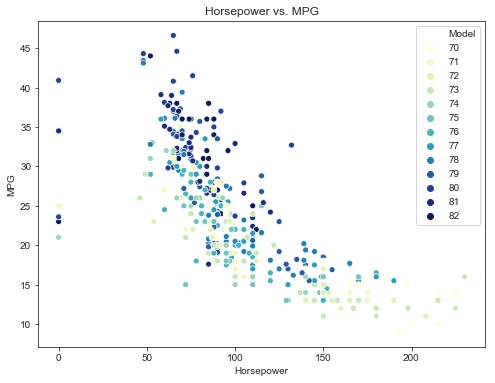

In [14]:
import seaborn as sns
sns.set_style('ticks')
plt.figure(figsize=(8,6))
sns.scatterplot(x='Horsepower', y='MPG', hue='Model', data=df, palette='YlGnBu', legend='full')
plt.title('Horsepower vs. MPG')
plt.show()

## Task 4: Scatter Plot Matrix
- Visualize gas mileage, weight, horsepower, and engine size in a scatter plot matrix. Color code the individual data points by country of origin.

<Figure size 576x432 with 0 Axes>

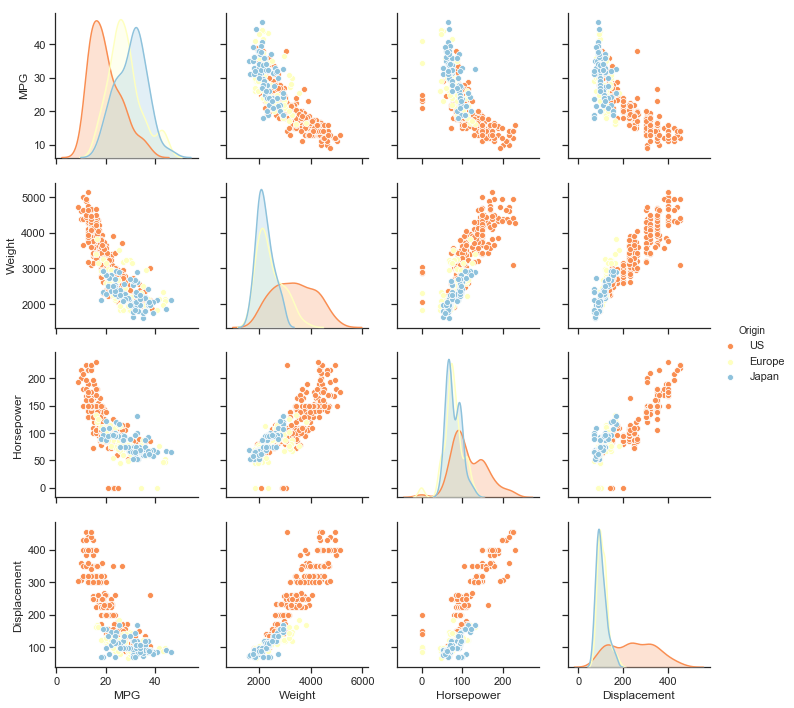

In [15]:
plt.figure(figsize=(8,6))
sns.set(style='ticks')
target_df = df[['MPG', 'Weight', 'Horsepower', 'Displacement', 'Origin']]
sns.pairplot(target_df, hue='Origin', palette='RdYlBu')
plt.show()